**Importing Dependencies

In [79]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pickle

# **Data Collection

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv'
titanic_dataset=pd.read_csv(url)

# **Exploratory Data Analysis

In [3]:
#getting top 10 data of the dataset
titanic_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# number of rows and columns in the dataset
titanic_dataset.shape

(891, 12)

In [5]:
# checking the tpye of datatypes in dataset and non-null values
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# checking the null values in the dataset
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling missing values

Age-177, Cabin-687 and Embarked-2 Coloumns are the only columns containing null values. As we know there are 891 rows in the dataset.


Cabin column has most number of missing values so it handling it is difficult, so we drop that column 

Age and embarked have less missing values so it can be handled

In [7]:
titanic_dataset= titanic_dataset.drop(columns='Cabin', axis=1)

In [8]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
# handling missing values in age column by replacing the missing values with average value of the particular column
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(), inplace=True)

In [10]:
# replacing the embarked missing values by mode of the columns as the column contains character not numerical
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0], inplace=True)

In [11]:
# checking again to see if there are no more null values
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the above we dataframe we can observe that Name, Sex, Ticket, Cabin and Embarked columns are missing

Name , Sex , Ticket, Cabin, Enbarked Columns are object datatype rest all are numerical and continuous datatypes, Survived is categorical 

We can also observe Pclass, Age are right skewed as there mean is greater than the standard value of the column can't say the same for survived as it a categorical data

In [14]:
# observing survival column
titanic_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

as we can observe the dataset is slightly imbalanced as 0-number of deaths is more than the 1- number of those have survived

before converting sex and embarked column into categorical column let's visualize these columns data

<AxesSubplot:xlabel='Survived', ylabel='count'>

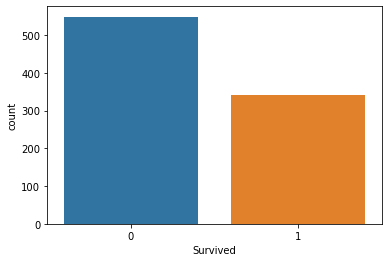

In [15]:
sns.countplot('Survived',data=titanic_dataset)

<AxesSubplot:xlabel='Sex', ylabel='count'>

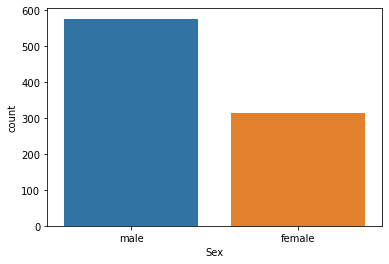

In [16]:
sns.countplot('Sex',data=titanic_dataset)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

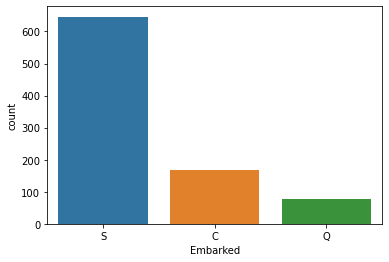

In [17]:
sns.countplot('Embarked',data=titanic_dataset)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

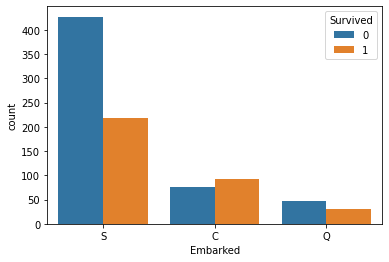

In [18]:
sns.countplot('Embarked', hue= 'Survived', data=titanic_dataset)

<AxesSubplot:xlabel='Sex', ylabel='count'>

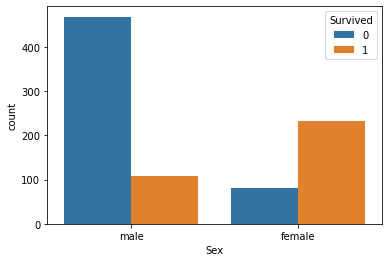

In [19]:
sns.countplot('Sex', hue='Survived',data=titanic_dataset)

Text(0, 0.5, 'Probability of Survival')

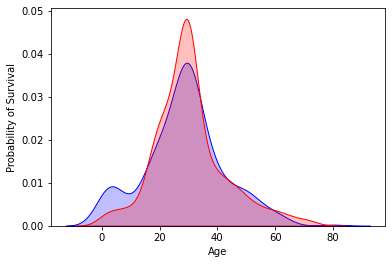

In [20]:
titanic_df=titanic_dataset
titanic_df['Target']=titanic_dataset.Survived
titanic_df['Target'].replace([0], 'Died', inplace=True)
titanic_df['Target'].replace([1], 'Survived', inplace=True)
sns.kdeplot(titanic_df.loc[(titanic_df['Target']=='Survived'),'Age'], color='b',shade=True, Label='Survived')
sns.kdeplot(titanic_df.loc[(titanic_df['Target']=='Died'),'Age'], color='r',shade=True, Label='Died')

plt.xlabel('Age')
plt.ylabel('Probability of Survival')

In [21]:
titanic_dataset.drop('Target',axis=1, inplace=True)

In [22]:
# transforming Sex and Embarked Columns into Categorical Data
le= LabelEncoder()
titanic_dataset['Sex']=le.fit_transform(titanic_dataset['Sex'])

In [23]:
titanic_dataset['Embarked']=le.fit_transform(titanic_dataset['Embarked'])

In [24]:
titanic_dataset.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0


# Data Visualization

<AxesSubplot:xlabel='Pclass', ylabel='count'>

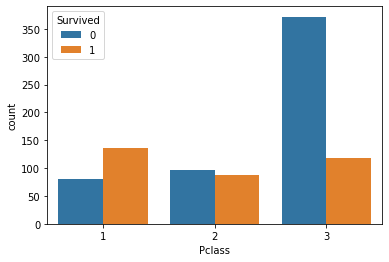

In [25]:
sns.countplot('Pclass', hue= 'Survived', data=titanic_dataset)

<AxesSubplot:xlabel='Parch', ylabel='count'>

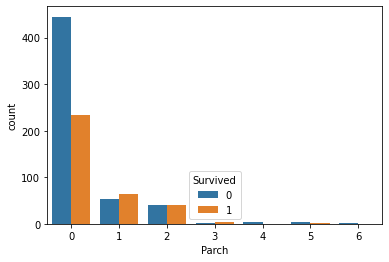

In [26]:
sns.countplot('Parch', hue= 'Survived', data=titanic_dataset)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

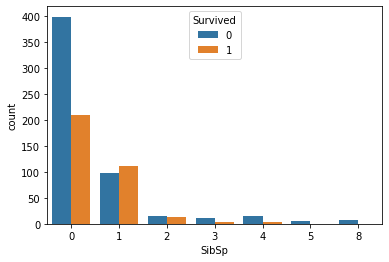

In [27]:
sns.countplot('SibSp', hue= 'Survived', data=titanic_dataset)

Passengers who travelled in 1st class have better ration of surivial to death(majority surivived), whereas people travelling in lower class have the most deaths compared all other class

SibSp and Parch doesn't concluded much other than passenger with zero parent or child and sibling or spouse have most Deaths and Survivals respectively

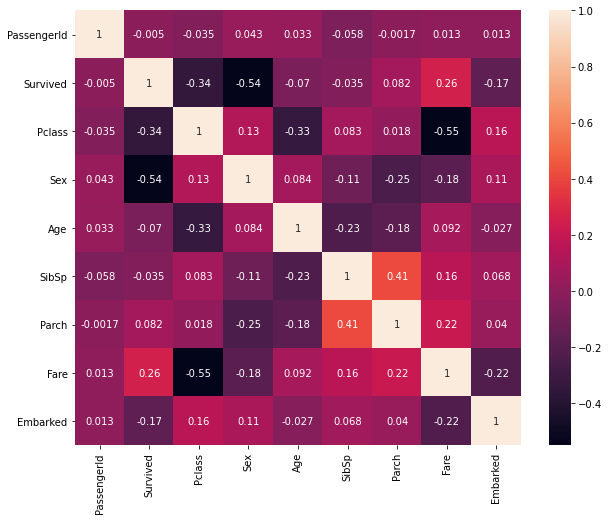

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(titanic_dataset.corr(), annot=True)
plt.show()

from the above heatmap we can say that :
1. Sex, Pclass and Fare have more corelation compared to other columns

Also PassengerID Name and Ticket column aren't useful in performing any conclusion over the surivival of the passenger so it's better to drop it off

In [29]:
new_dataset=titanic_dataset.drop(columns=['PassengerId','Name','Ticket',],axis=1)

In [30]:
new_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


Survived
0.4777174662568536


<Figure size 432x288 with 0 Axes>

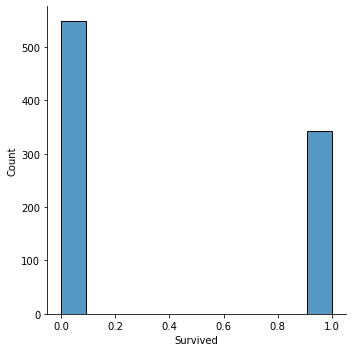

Pclass
-0.6294858816096934


<Figure size 432x288 with 0 Axes>

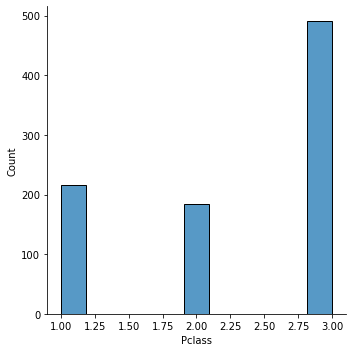

Sex
-0.6178784065548295


<Figure size 432x288 with 0 Axes>

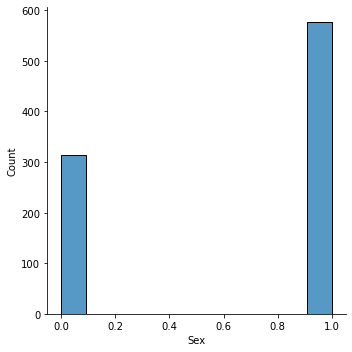

Age
0.4337562902461274


<Figure size 432x288 with 0 Axes>

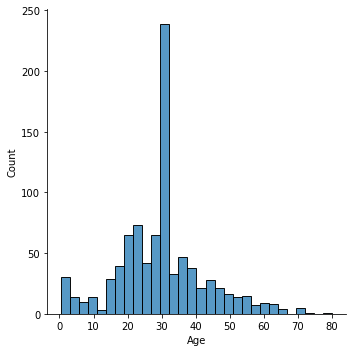

SibSp
3.6891276847759507


<Figure size 432x288 with 0 Axes>

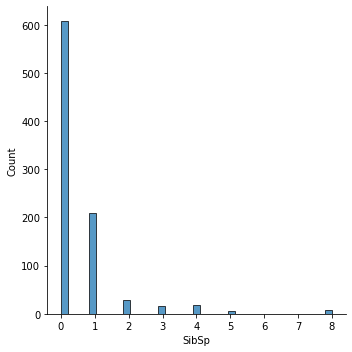

Parch
2.7444867379203735


<Figure size 432x288 with 0 Axes>

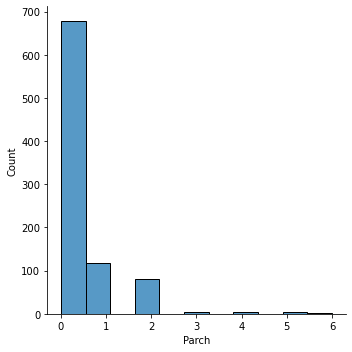

Fare
4.7792532923723545


<Figure size 432x288 with 0 Axes>

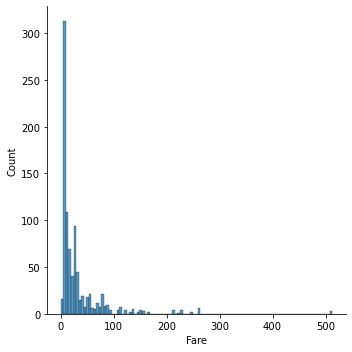

Embarked
-1.2626927433430535


<Figure size 432x288 with 0 Axes>

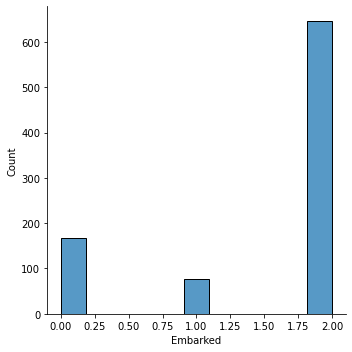

In [31]:
for col in new_dataset:
    print(col)
    print(skew(new_dataset[col]))
    plt.figure()
    sns.displot(new_dataset[col])
    plt.show()

Survived
0.4777174662568536


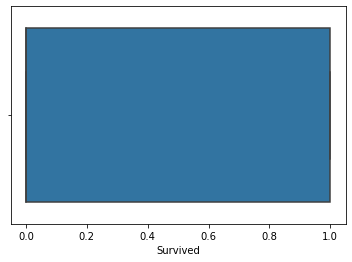

Pclass
-0.6294858816096934


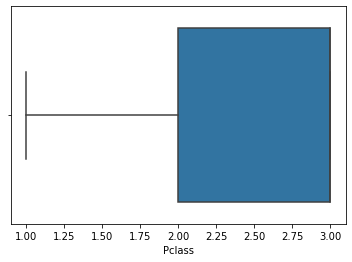

Sex
-0.6178784065548295


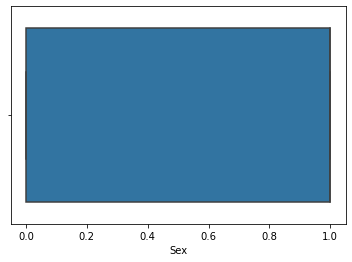

Age
0.4337562902461274


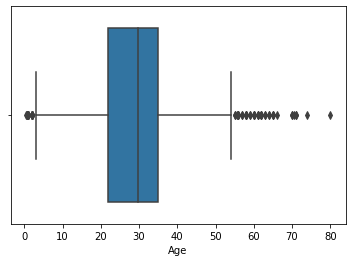

SibSp
3.6891276847759507


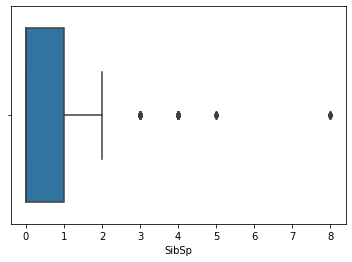

Parch
2.7444867379203735


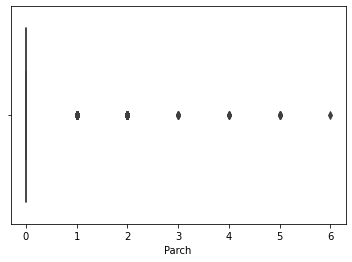

Fare
4.7792532923723545


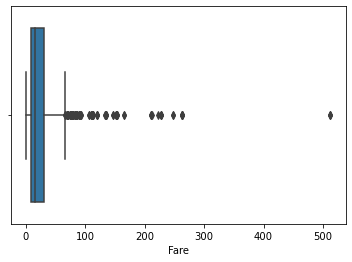

Embarked
-1.2626927433430535


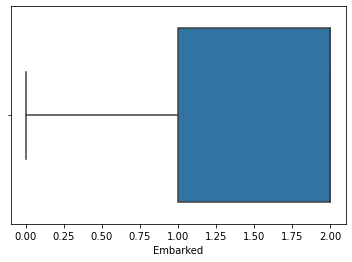

In [32]:
for col in new_dataset:
    print(col)
    print(skew(new_dataset[col]))
    plt.figure()
    sns.boxplot(new_dataset[col])
    plt.show()

From the above graph we can say that age and fare have more outliers and skewness

In [33]:
#checking VIF value 
vif_data = pd.DataFrame()
vif_data["feature"] = new_dataset.columns

vif_data["VIF"] = [variance_inflation_factor(new_dataset.values, i) for i in range(len(new_dataset.columns))]
  
print(vif_data)

    feature       VIF
0  Survived  1.953686
1    Pclass  6.125204
2       Sex  3.704164
3       Age  4.890259
4     SibSp  1.581099
5     Parch  1.616113
6      Fare  1.889760
7  Embarked  4.701554


In [35]:
#arresting the outliers using IQR method
#Fare is right skewed
Q1=new_dataset['Fare'].quantile(0.25)
Q3=new_dataset['Fare'].quantile(0.75)
IQR_FARE=Q3-Q1
whisker_width = 1.5
Fare_outliers = new_dataset[(new_dataset['Fare'] < Q1 - whisker_width*IQR_FARE) | (new_dataset['Fare'] > Q3 + whisker_width*IQR_FARE)]
lower_whisker = Q1 -(whisker_width*IQR_FARE)
upper_whisker = Q3 + (whisker_width*IQR_FARE)
new_dataset['Fare']=np.where(new_dataset['Fare']>upper_whisker,upper_whisker,np.where(new_dataset['Fare']<lower_whisker,lower_whisker,new_dataset['Fare']))

In [37]:
#arresting the outliers using IQR method
#Age
Q1=new_dataset['Age'].quantile(0.25)
Q3=new_dataset['Age'].quantile(0.75)
IQR_AGE=Q3-Q1
whisker_width = 1.5
Age_outliers = new_dataset[(new_dataset['Age'] < Q1 - whisker_width*IQR_AGE) | (new_dataset['Age'] > Q3 + whisker_width*IQR_AGE)]
lower_whisker = Q1 -(whisker_width*IQR_AGE)
upper_whisker = Q3 + (whisker_width*IQR_AGE)
new_dataset['Age']=np.where(new_dataset['Age']>upper_whisker,upper_whisker,np.where(new_dataset['Age']<lower_whisker,lower_whisker,new_dataset['Age']))


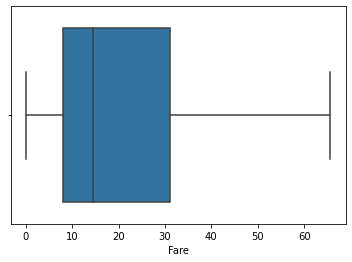

In [38]:
plt.figure()
sns.boxplot(new_dataset['Fare'])
plt.show()

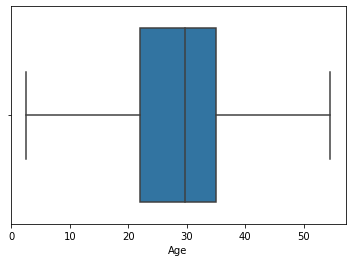

In [39]:
plt.figure()
sns.boxplot(new_dataset['Age'])
plt.show()

In [40]:
new_dataset.shape

(891, 8)

SibSp and Parch outliers cannot be handled as it makes the dataset too very biased

In [45]:
#we know that the dataset is bit imbalance as it is death: 549 , survival: 342 ( very slighly imbalance)
# dividing the class
new_dataset_0=new_dataset[new_dataset['Survived']==0]
new_dataset_1=new_dataset[new_dataset['Survived']==1]

In [46]:
print('Shape of death : ',new_dataset_0.shape,'\n\nShape of Survival : ',new_dataset_1.shape)

Shape of death :  (549, 8) 

Shape of Survival :  (342, 8)


In [49]:
new_dataset_0_under= new_dataset_0.sample(342)
new_dataset_test_under=pd.concat([new_dataset_0_under, new_dataset_1], axis=0)
new_dataset_test_under.shape

(684, 8)

In [50]:
#separating features and target
X=new_dataset_test_under.drop(columns=['Survived'],axis=1)
Y=new_dataset_test_under['Survived']

In [62]:
X1=new_dataset.drop(columns=['Survived'],axis=1)
Y1=new_dataset['Survived']

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=15, stratify=Y)

In [63]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size= 0.2, random_state=15)

In [53]:
print(X.shape,X_train.shape,X_test.shape)

(684, 7) (547, 7) (137, 7)


In [55]:
#best models for binary classified data training
lr=LogisticRegression()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()

In [57]:
#training the data and f1 score for Logistic Regression
lr.fit(X_train, Y_train)
X_train_prediction=lr.predict(X_test)
print('              LOGISTIC REGRESSION SCORES : \n\n',classification_report(Y_test, X_train_prediction))

              LOGISTIC REGRESSION SCORES : 

               precision    recall  f1-score   support

           0       0.80      0.75      0.78        69
           1       0.76      0.81      0.79        68

    accuracy                           0.78       137
   macro avg       0.78      0.78      0.78       137
weighted avg       0.78      0.78      0.78       137



In [74]:
#training the data and f1 score for RANDOM FOREST CLASSIFIER
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
rfc.fit(X_train, Y_train)
X_train_prediction=rfc.predict(X_test)
print('              RANDOM FOREST CLASSIFIER : \n\n',classification_report(Y_test, X_train_prediction))

              RANDOM FOREST CLASSIFIER : 

               precision    recall  f1-score   support

           0       0.83      0.72      0.78        69
           1       0.75      0.85      0.80        68

    accuracy                           0.79       137
   macro avg       0.79      0.79      0.79       137
weighted avg       0.79      0.79      0.79       137



In [61]:
#training the data and f1 score for KN CLASSIFIER
knn.fit(X_train, Y_train)
X_train_prediction=knn.predict(X_test)
print('              KN CLASSIFIER : \n\n',classification_report(Y_test, X_train_prediction))

              KN CLASSIFIER : 

               precision    recall  f1-score   support

           0       0.78      0.65      0.71        69
           1       0.70      0.81      0.75        68

    accuracy                           0.73       137
   macro avg       0.74      0.73      0.73       137
weighted avg       0.74      0.73      0.73       137



In [73]:
#training the data and f1 score for RANDOM FOREST CLASSIFIER with data imbalance
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
rfc.fit(X1_train, Y1_train)
X1_train_prediction=rfc.predict(X1_test)
print('              RANDOM FOREST CLASSIFIER : \n\n',classification_report(Y1_test, X1_train_prediction))

              RANDOM FOREST CLASSIFIER : 

               precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.77      0.78      0.77        76

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [66]:
#training the data and f1 score for Logistic Regression data imbalance
lr.fit(X1_train, Y1_train)
X1_train_prediction=lr.predict(X1_test)
print('              LOGISTIC REGRESSION SCORES : \n\n',classification_report(Y1_test, X1_train_prediction))

              LOGISTIC REGRESSION SCORES : 

               precision    recall  f1-score   support

           0       0.81      0.84      0.82       103
           1       0.77      0.72      0.75        76

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [67]:
#training the data and f1 score for KN CLASSIFIER with data imbalance
knn.fit(X1_train, Y1_train)
X1_train_prediction=knn.predict(X1_test)
print('              KN CLASSIFIER : \n\n',classification_report(Y1_test, X1_train_prediction)) 

              KN CLASSIFIER : 

               precision    recall  f1-score   support

           0       0.75      0.75      0.75       103
           1       0.66      0.67      0.67        76

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179



Random Forest and Logistic Regression Model without filtering data immbalance has good f1 score compared all other model 

In [71]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(lr,grid,cv=10)
logreg_cv.fit(X1_train,Y1_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.7837245696400627


In [78]:
param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X1_train,Y1_train)

print ('\n',CV_rfc.best_params_)


 {'max_features': 'sqrt', 'n_estimators': 200}


In [81]:
saved_model1= pickle.dumps(rfc)
saved_model2=pickle.dumps(lr)